<a href="https://colab.research.google.com/github/TravisJRCain/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/module3-Intro-to-Keras/Travis_Cain_LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
##### Your Code Here #####

# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# random seed

np.random.seed(42)

In [2]:
# Loading data

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [7]:
# Scale data

scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(X_train)
print('\n')
X_train.shape

[[2.41189924e-03 0.00000000e+00 1.59296858e-02 ... 4.10962409e-02
  7.76718953e-01 3.66343633e-02]
 [4.07923050e-05 1.54587284e-01 3.80378407e-03 ... 2.75446433e-02
  7.40857215e-01 5.82747215e-03]
 [6.34505528e-03 0.00000000e+00 2.34463745e-02 ... 2.61666721e-02
  4.86441025e-01 4.22293817e-03]
 ...
 [7.29281484e-05 7.36435428e-02 1.27508534e-02 ... 3.55593107e-02
  7.62210668e-01 1.64751126e-02]
 [4.37205159e-03 0.00000000e+00 3.98313637e-02 ... 2.99040371e-02
  5.32881804e-01 3.21214113e-02]
 [3.09311543e-05 1.28969372e-01 6.29800433e-03 ... 3.35320367e-02
  8.09712706e-01 9.41476414e-03]]




(404, 13)

In [9]:
# Model

model = Sequential(name='Boston_Housing')

model.add(Dense(24, input_dim=13, activation='relu'))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae', 'mape'])

model.summary()

Model: "Boston_Housing"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                400       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Running the model

housing = model.fit(X_train,
                    y_train,
                    epochs=500,
                    validation_split=0.1,
                    verbose=False)

scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]}')

4/4 [==============================] - 0s 2ms/step - loss: 29.7107 - mae: 3.6655 - mape: 18.0637
mae: 3.6654794216156006


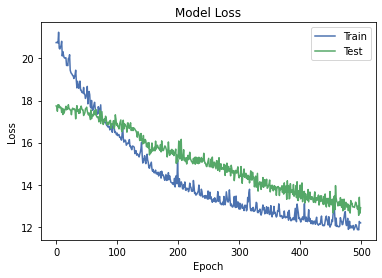

In [12]:
# Visualizations

plt.style.use(['seaborn-deep'])
plt.plot(housing.history['loss'])
plt.plot(housing.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
# Linear Regression model

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [17]:
# Compare and contrast

print('Keras MSE:', (scores[1]))
print('LR MSE:', mean_squared_error(y_test, y_pred))

Keras MSE: 3.6654794216156006
LR MSE: 18.16551049349651


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [18]:
##### Your Code Here #####

# Import

((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [20]:
# Look at the shapes

print(X_train.shape)
print(X_train[0].shape)
print('----------')
print(X_test.shape)

(60000, 28, 28)
(28, 28)
----------
(10000, 28, 28)


In [0]:
# Reshape data

# 28 * 28 = 784
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [23]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
# Model

fmnist_model = Sequential()

fmnist_model.add(Dense(16, input_dim=784, activation='relu'))
fmnist_model.add(Dense(16))
fmnist_model.add(LeakyReLU(alpha=0.05))
fmnist_model.add(Dense(16, activation='relu'))
fmnist_model.add(Dense(10, activation='softmax'))

fmnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adamax',
                    metrics=['accuracy',
                            'categorical_accuracy',
                            'cosine_proximity'])

fmnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Running the model

fashion = fmnist_model.fit(X_train, y_train, batch_size=50000,
                           epochs=400, validation_split=.1,
                           verbose=1)
scores = fmnist_model.evaluate(X_test, y_test)
print(f'{fmnist_model.metrics_names[1]}: {scores[1]*100}')

Epoch 1/400
2/2 [==============================] - 0s 99ms/step - loss: 68.3510 - accuracy: 0.0905 - categorical_accuracy: 0.0905 - cosine_proximity: 0.0925 - val_loss: 35.4551 - val_accuracy: 0.0782 - val_categorical_accuracy: 0.0782 - val_cosine_proximity: 0.0878
Epoch 2/400
2/2 [==============================] - 0s 35ms/step - loss: 35.0983 - accuracy: 0.0811 - categorical_accuracy: 0.0811 - cosine_proximity: 0.0895 - val_loss: 23.0966 - val_accuracy: 0.0973 - val_categorical_accuracy: 0.0973 - val_cosine_proximity: 0.1116
Epoch 3/400
2/2 [==============================] - 0s 34ms/step - loss: 22.7466 - accuracy: 0.1007 - categorical_accuracy: 0.1007 - cosine_proximity: 0.1149 - val_loss: 14.4258 - val_accuracy: 0.1463 - val_categorical_accuracy: 0.1463 - val_cosine_proximity: 0.1702
Epoch 4/400
2/2 [==============================] - 0s 33ms/step - loss: 14.3048 - accuracy: 0.1530 - categorical_accuracy: 0.1530 - cosine_proximity: 0.1748 - val_loss: 10.6840 - val_accuracy: 0.1755 - 

In [26]:
# 33% accuracy....try and do better

fashion = fmnist_model.fit(X_train, y_train, batch_size=128,
                           epochs=50, validation_split=.1,
                           verbose=1)
scores = fmnist_model.evaluate(X_test, y_test)
print(f'{fmnist_model.metrics_names[1]}: {scores[1]*100}')

Epoch 1/50
422/422 [==============================] - 1s 2ms/step - loss: 1.5670 - accuracy: 0.3552 - categorical_accuracy: 0.3552 - cosine_proximity: 0.5167 - val_loss: 1.4979 - val_accuracy: 0.3628 - val_categorical_accuracy: 0.3628 - val_cosine_proximity: 0.5301
Epoch 2/50
422/422 [==============================] - 1s 2ms/step - loss: 1.3988 - accuracy: 0.4191 - categorical_accuracy: 0.4191 - cosine_proximity: 0.5639 - val_loss: 1.3085 - val_accuracy: 0.4473 - val_categorical_accuracy: 0.4473 - val_cosine_proximity: 0.5906
Epoch 3/50
422/422 [==============================] - 1s 2ms/step - loss: 1.2044 - accuracy: 0.5115 - categorical_accuracy: 0.5115 - cosine_proximity: 0.6298 - val_loss: 1.1563 - val_accuracy: 0.5348 - val_categorical_accuracy: 0.5348 - val_cosine_proximity: 0.6500
Epoch 4/50
422/422 [==============================] - 1s 2ms/step - loss: 1.1008 - accuracy: 0.5531 - categorical_accuracy: 0.5531 - cosine_proximity: 0.6621 - val_loss: 1.0685 - val_accuracy: 0.5393 - 

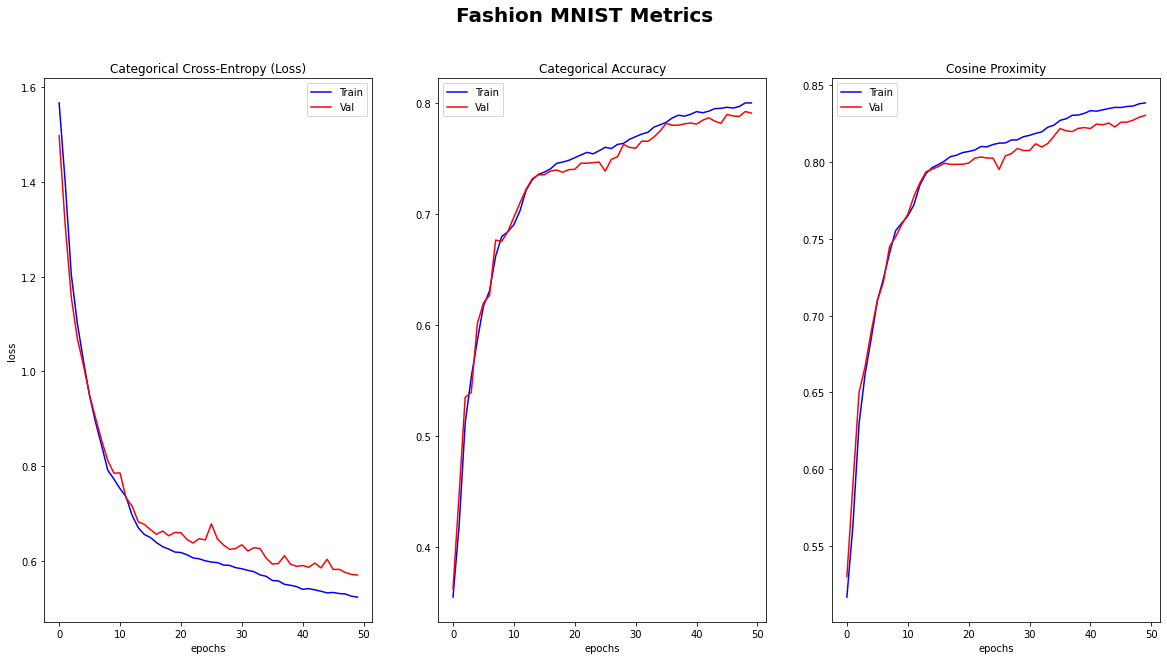

In [32]:
# Better accuracy!

### Visualizations

fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(20,10))
fig.suptitle('Fashion MNIST Metrics', fontsize=20, fontweight='bold')

ax1.plot(fashion.history['loss'], color= 'b', label='Train')
ax1.plot(fashion.history['val_loss'], color='r', label='Val')
ax1.legend()
ax1.set(title='Categorical Cross-Entropy (Loss)', xlabel='epochs', ylabel='loss')

ax2.plot(fashion.history['categorical_accuracy'], color='b', label='Train')
ax2.plot(fashion.history['val_categorical_accuracy'], color='r', label='Val')
ax2.legend()
ax2.set(title='Categorical Accuracy', xlabel='epochs', ylabel='')

ax3.plot(fashion.history['cosine_proximity'], color='b', label='Train')
ax3.plot(fashion.history['val_cosine_proximity'], color='r', label='Val')
ax3.legend()
ax3.set(title='Cosine Proximity', xlabel='epochs', ylabel='');


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.